In [1]:
import sys
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import plotly.express as px
from scipy.fft import fft
%matplotlib inline

In [3]:
parent_dir = os.path.abspath(r'D:')
output_dir = os.path.join(parent_dir, 'processed_data', 'ModelingData')

big_train_path = os.path.join(output_dir, 'big_train.parquet')
big_train_df = pd.read_parquet(big_train_path)

big_test_path = os.path.join(output_dir, 'big_test.parquet')
big_test_df = pd.read_parquet(big_test_path)



In [6]:
columns_to_drop = [
    'wind_speed_mean', 'yaw_error_mean', 'Turbulence',
    'tip_deflection_edge_V1_mean', 'tip_deflection_edge_V2_mean',
    'tip_deflection_edge_V3_mean', 'tip_deflection_flap_V1_mean',
    'tip_deflection_flap_V2_mean', 'tip_deflection_flap_V3_mean',
    'tower_deflection_Y_mean', 'tower_deflection_Z_mean',
    'wind_speed_max', 'wind_speed_median', 'wind_speed_min',
    'wind_speed_q1', 'wind_speed_q3', 'wind_speed_std',
    'yaw_error_max', 'yaw_error_median', 'yaw_error_min',
    'yaw_error_q1', 'yaw_error_q3', 'yaw_error_std',
    'tip_deflection_edge_V1_max', 'tip_deflection_edge_V1_median',
    'tip_deflection_edge_V1_min', 'tip_deflection_edge_V1_q1',
    'tip_deflection_edge_V1_q3', 'tip_deflection_edge_V1_std',
    'tip_deflection_edge_V2_max', 'tip_deflection_edge_V2_median',
    'tip_deflection_edge_V2_min', 'tip_deflection_edge_V2_q1',
    'tip_deflection_edge_V2_q3', 'tip_deflection_edge_V2_std',
    'tip_deflection_edge_V3_max', 'tip_deflection_edge_V3_median',
    'tip_deflection_edge_V3_min', 'tip_deflection_edge_V3_q1',
    'tip_deflection_edge_V3_q3', 'tip_deflection_edge_V3_std',
    'tip_deflection_flap_V1_max', 'tip_deflection_flap_V1_median',
    'tip_deflection_flap_V1_min', 'tip_deflection_flap_V1_q1',
    'tip_deflection_flap_V1_q3', 'tip_deflection_flap_V1_std',
    'tip_deflection_flap_V2_max', 'tip_deflection_flap_V2_median',
    'tip_deflection_flap_V2_min', 'tip_deflection_flap_V2_q1',
    'tip_deflection_flap_V2_q3', 'tip_deflection_flap_V2_std',
    'tip_deflection_flap_V3_max', 'tip_deflection_flap_V3_median',
    'tip_deflection_flap_V3_min', 'tip_deflection_flap_V3_q1',
    'tip_deflection_flap_V3_q3', 'tip_deflection_flap_V3_std',
    'tower_deflection_Y_max', 'tower_deflection_Y_median',
    'tower_deflection_Y_min', 'tower_deflection_Y_q1',
    'tower_deflection_Y_q3', 'tower_deflection_Y_std',
    'tower_deflection_Z_max', 'tower_deflection_Z_median',
    'tower_deflection_Z_min', 'tower_deflection_Z_q1',
    'tower_deflection_Z_q3', 'tower_deflection_Z_std'
]

## Identify the targets 

In [51]:
def split_data(df, target_variable, columns_to_drop):
    X = df.drop(columns=columns_to_drop, axis=1)
    y = df[target_variable]
    return X, y


In [52]:
X_train, y_train = split_data(big_train_df, 'Turbulence', columns_to_drop)
X_test, y_test = split_data(big_test_df, 'Turbulence', columns_to_drop)


In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

## Wind speed

In [19]:

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

train_predictions = rf_model.predict(X_train)
test_predictions = rf_model.predict(X_test)

train_mae = mean_absolute_error(y_train, train_predictions)
train_mse = mean_squared_error(y_train, train_predictions)
train_rmse = mean_squared_error(y_train, train_predictions, squared=False)
train_r2 = r2_score(y_train, train_predictions)

test_mae = mean_absolute_error(y_test, test_predictions)
test_mse = mean_squared_error(y_test, test_predictions)
test_rmse = mean_squared_error(y_test, test_predictions, squared=False)
test_r2 = r2_score(y_test, test_predictions)

print("Training MAE:", train_mae)
print("Training MSE:", train_mse)
print("Training RMSE:", train_rmse)
print("Training R2:", train_r2)
print()
print("Test MAE:", test_mae)
print("Test MSE:", test_mse)
print("Test RMSE:", test_rmse)
print("Test R2:", test_r2)


Training MAE: 0.02523325826904024
Training MSE: 0.0022893844448756057
Training RMSE: 0.0478475124209776
Training R2: 0.9999415429771913

Test MAE: 0.13437118822599303
Test MSE: 0.04544730709939596
Test RMSE: 0.21318374023221368
Test R2: 0.9987754140653321


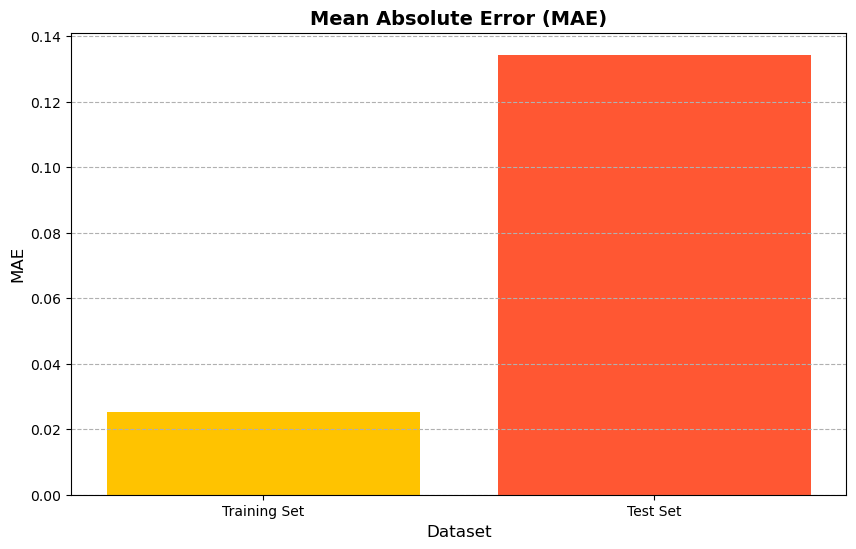

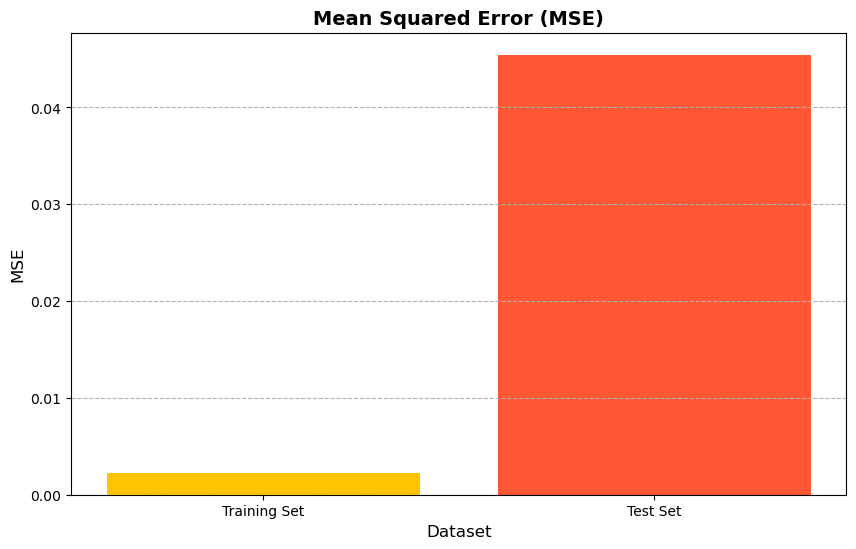

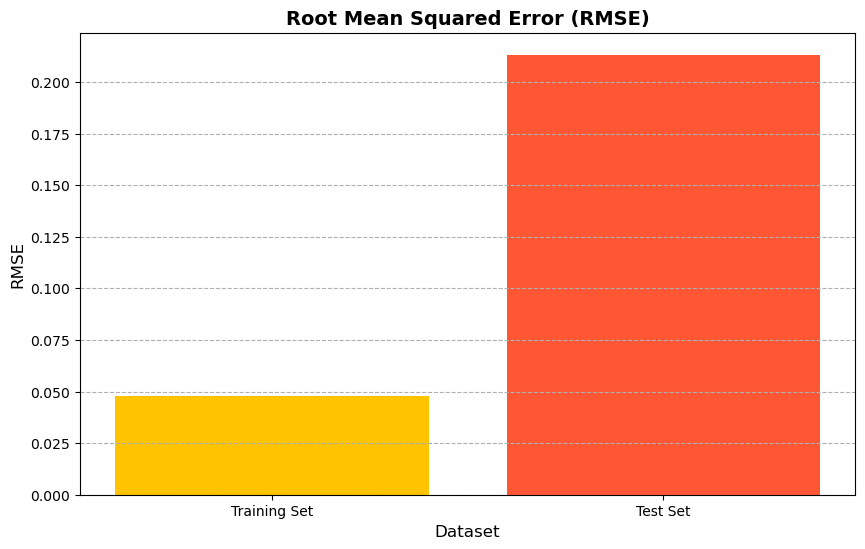

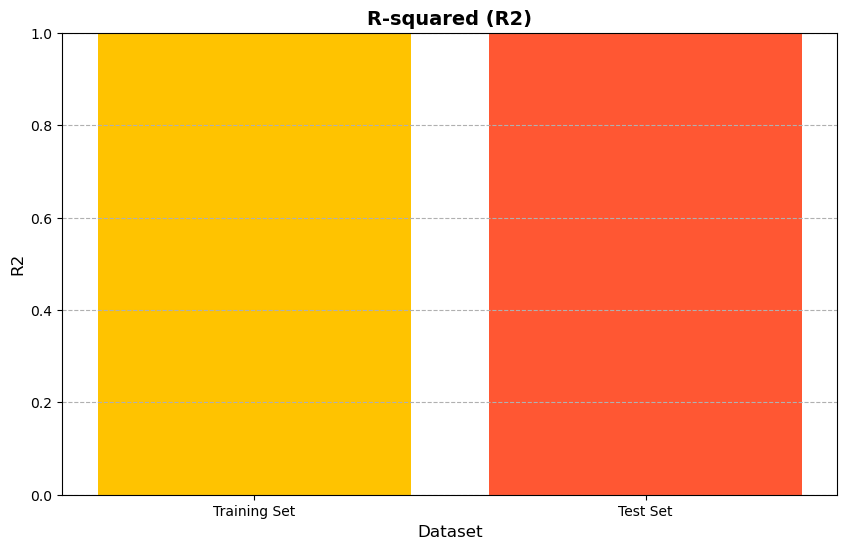

In [30]:
mae_values = [train_mae, test_mae]
mse_values = [train_mse, test_mse]
rmse_values = [train_rmse, test_rmse]
r2_values = [train_r2, test_r2]

labels = ['Training Set', 'Test Set']
x = np.arange(len(labels))

plt.figure(figsize=(10, 6))
plt.bar(x, mae_values, color=['#FFC300', '#FF5733'])
plt.xticks(x, labels)
plt.xlabel('Dataset', fontsize=12)
plt.ylabel('MAE', fontsize=12)
plt.title('Mean Absolute Error (MAE)', fontsize=14, fontweight='bold')
plt.ylim(bottom=0)
plt.grid(axis='y', linestyle='--')
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(x, mse_values, color=['#FFC300', '#FF5733'])
plt.xticks(x, labels)
plt.xlabel('Dataset', fontsize=12)
plt.ylabel('MSE', fontsize=12)
plt.title('Mean Squared Error (MSE)', fontsize=14, fontweight='bold')
plt.ylim(bottom=0)
plt.grid(axis='y', linestyle='--')
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(x, rmse_values, color=['#FFC300', '#FF5733'])
plt.xticks(x, labels)
plt.xlabel('Dataset', fontsize=12)
plt.ylabel('RMSE', fontsize=12)
plt.title('Root Mean Squared Error (RMSE)', fontsize=14, fontweight='bold')
plt.ylim(bottom=0)
plt.grid(axis='y', linestyle='--')
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(x, r2_values, color=['#FFC300', '#FF5733'])
plt.xticks(x, labels)
plt.xlabel('Dataset', fontsize=12)
plt.ylabel('R2', fontsize=12)
plt.title('R-squared (R2)', fontsize=14, fontweight='bold')
plt.ylim(top=1)
plt.grid(axis='y', linestyle='--')
plt.show()


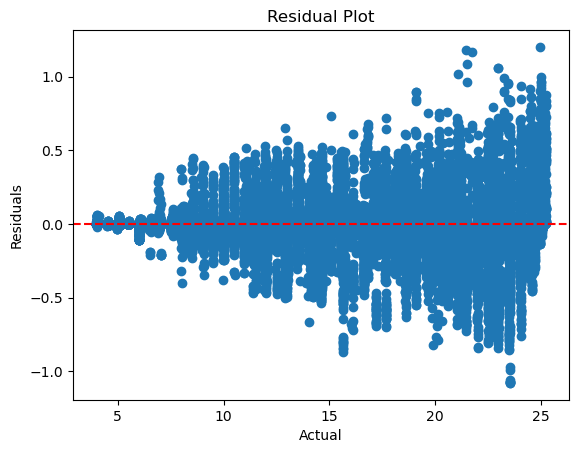

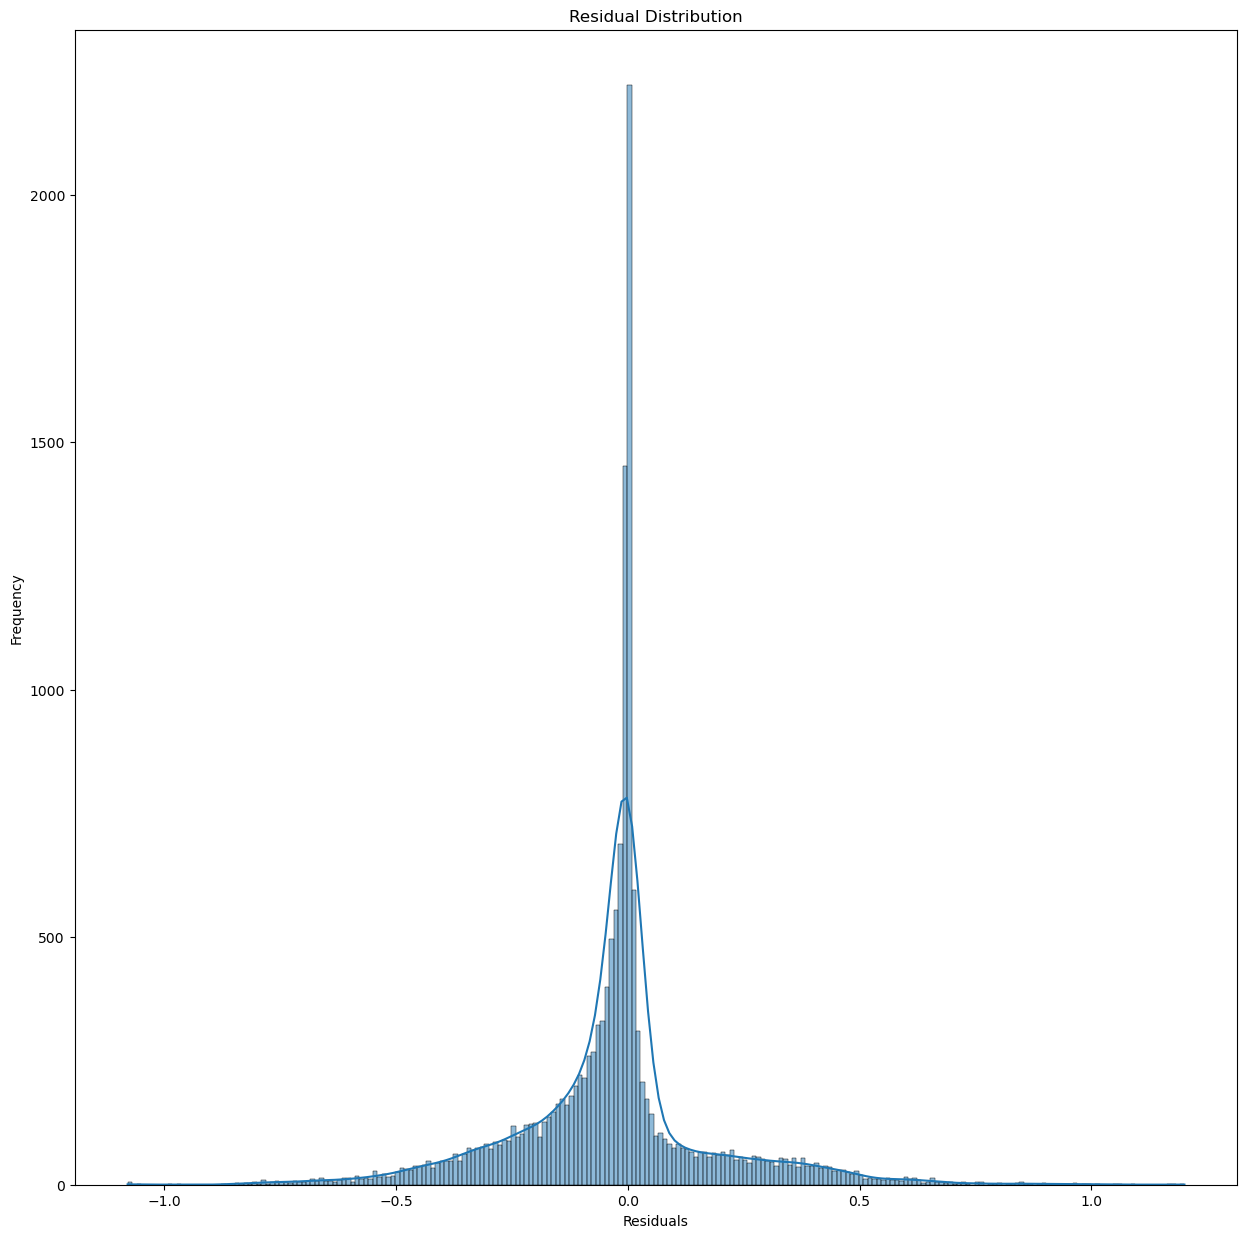

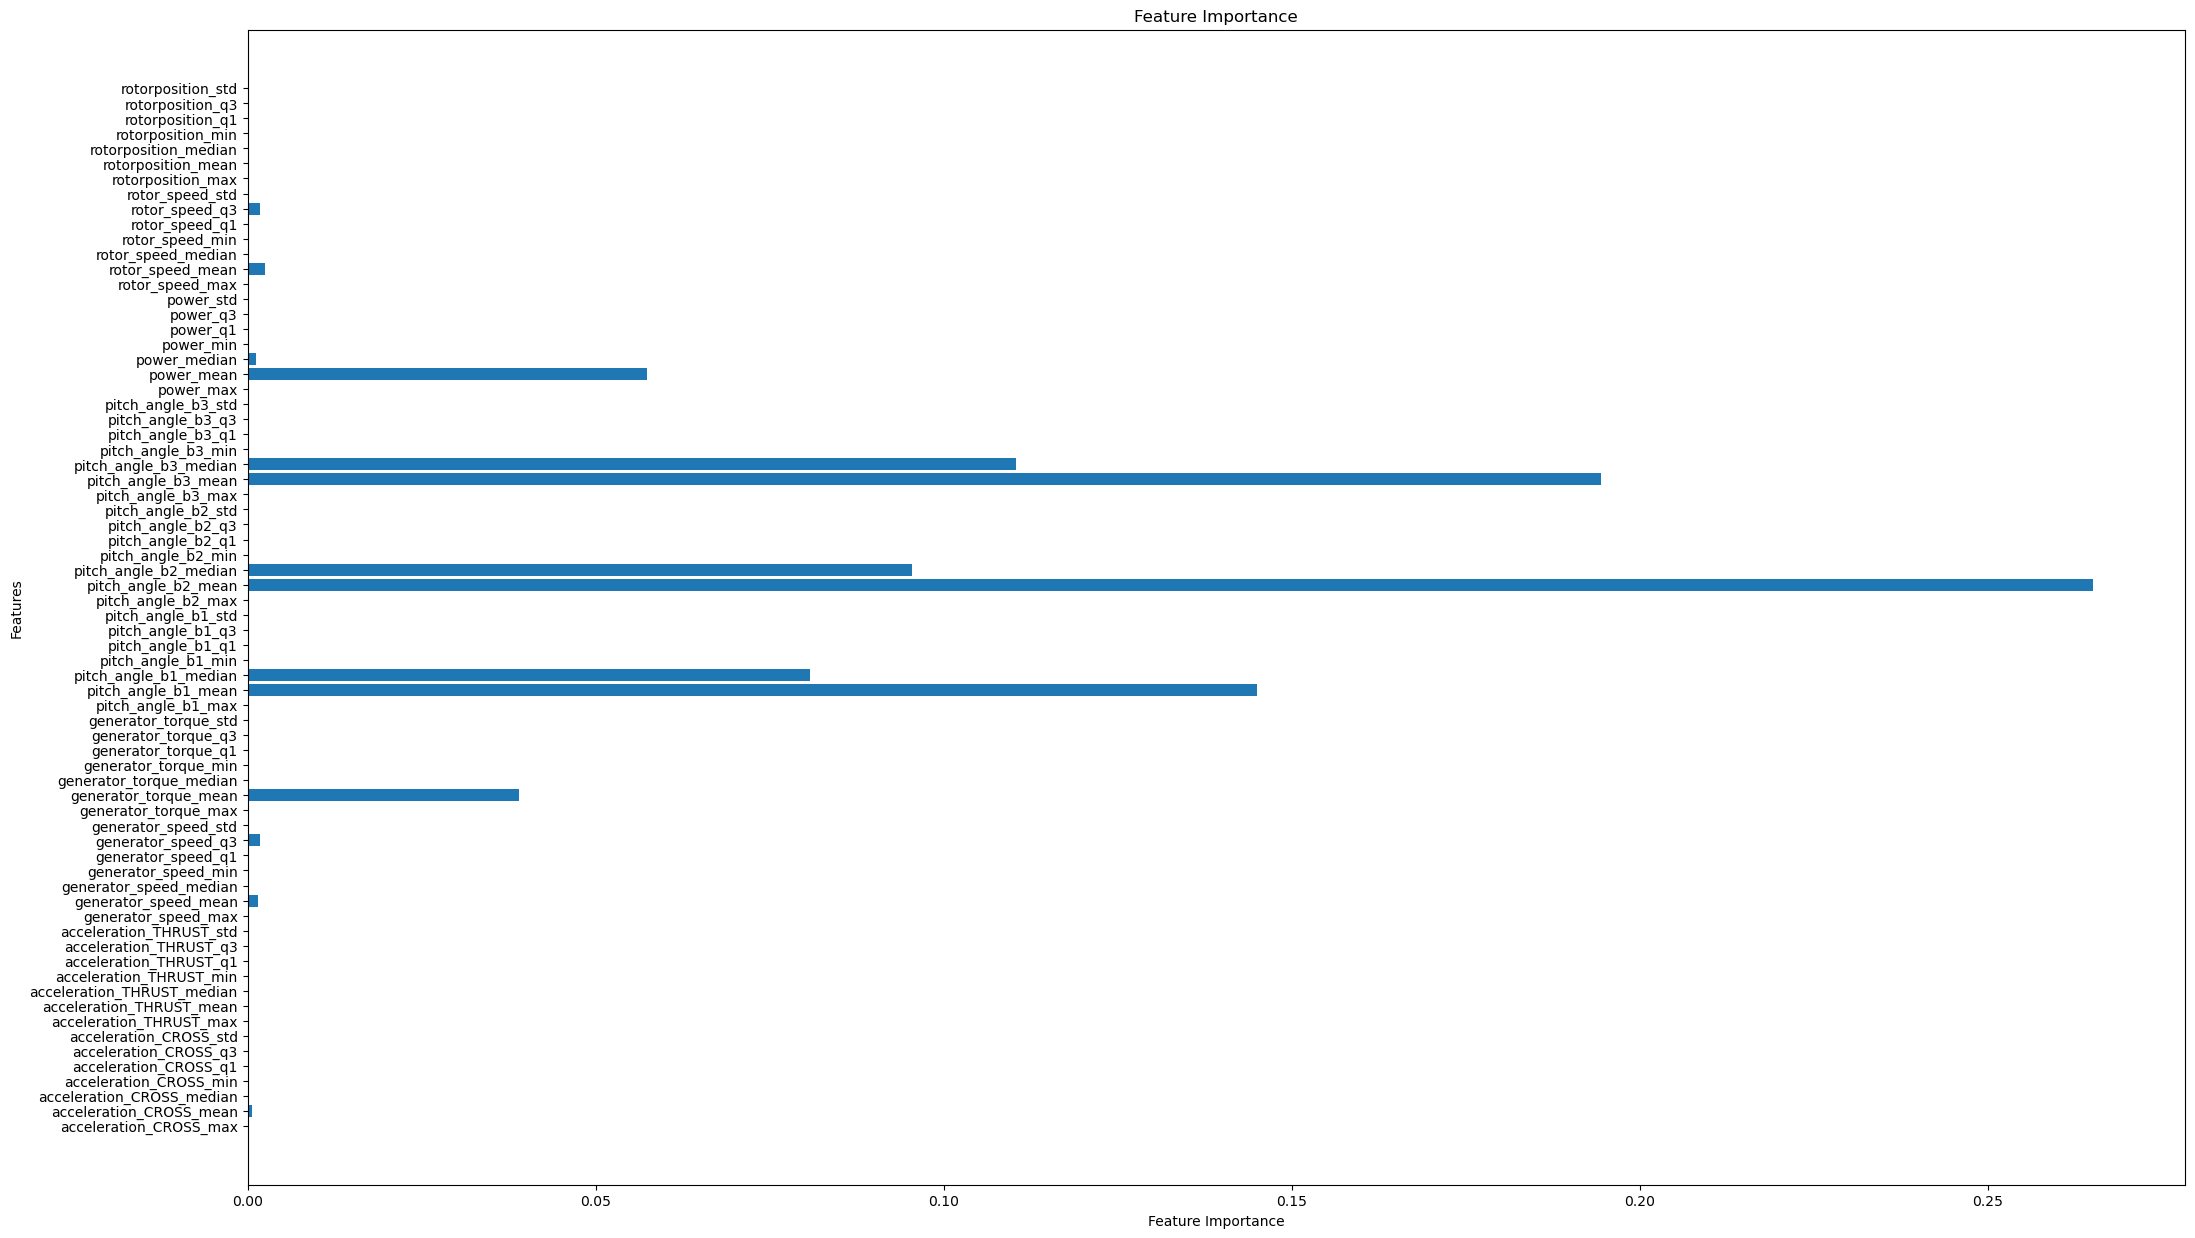

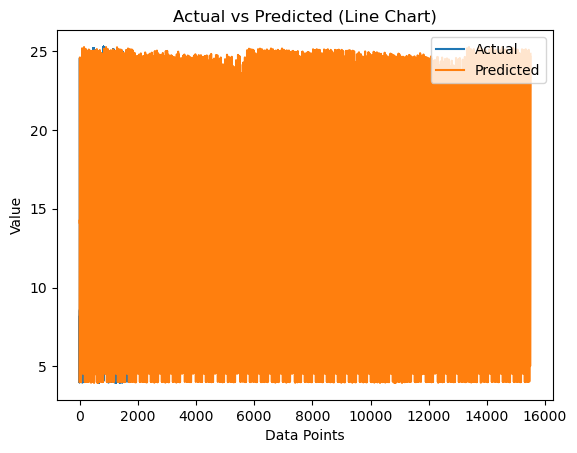

In [37]:

residuals = y_test - test_predictions
plt.scatter(y_test, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

plt.figure(figsize=(15, 15)) 
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residual Distribution')
plt.show()

feature_importances = rf_model.feature_importances_
feature_names = X_train.columns

plt.figure(figsize=(25, 15)) 
plt.barh(feature_names, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()


plt.plot(y_test, label='Actual')
plt.plot(test_predictions, label='Predicted')
plt.xlabel('Data Points')
plt.ylabel('Value')
plt.title('Actual vs Predicted (Line Chart)')
plt.legend()
plt.show()



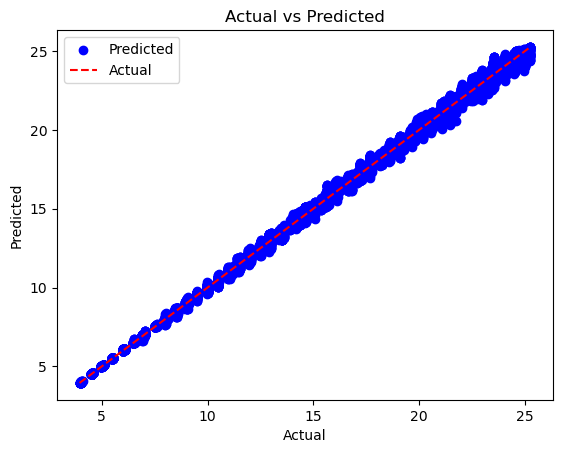

In [28]:
plt.scatter(y_test, test_predictions, color='blue', label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()



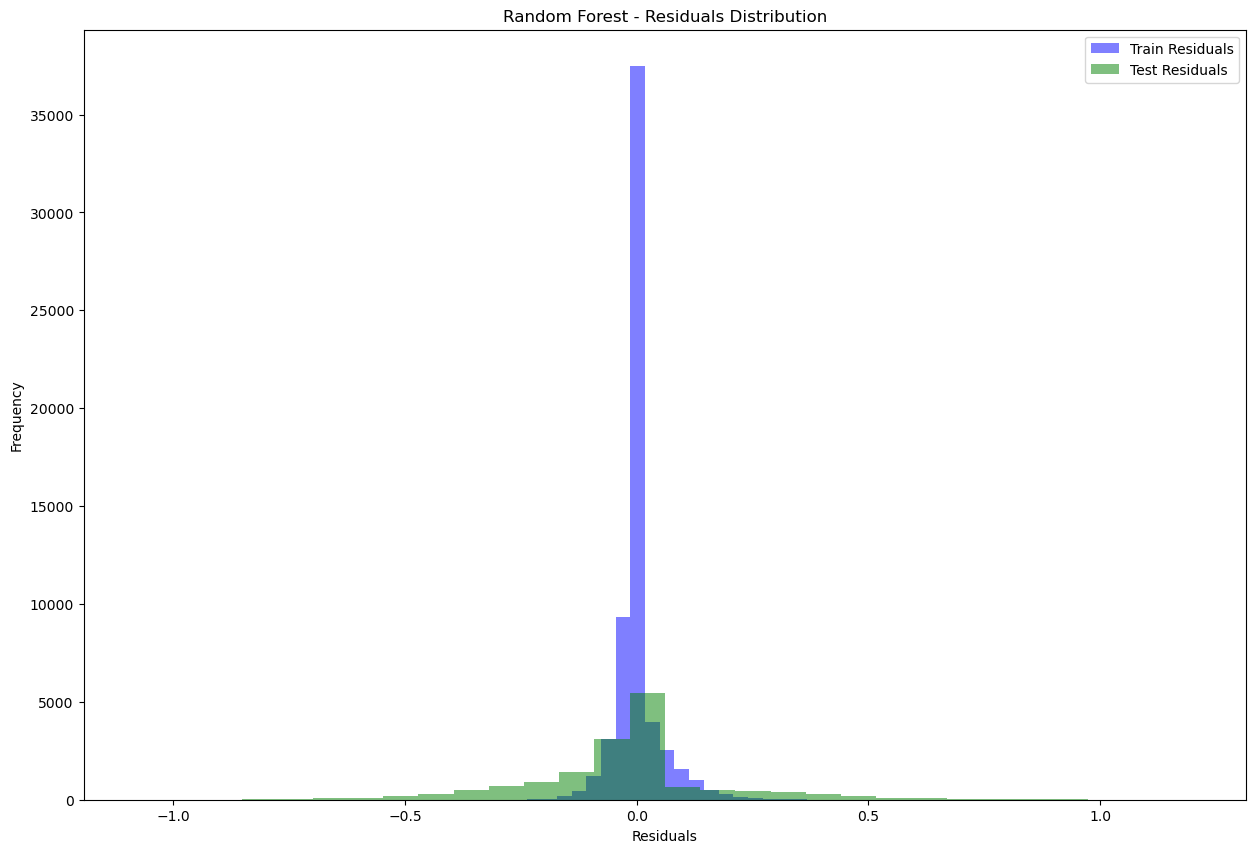

In [40]:
train_residuals = y_train - train_predictions
test_residuals = y_test - test_predictions

plt.figure(figsize=(15, 10))
plt.hist(train_residuals, bins=30, alpha=0.5, label='Train Residuals', color='blue')
plt.hist(test_residuals, bins=30, alpha=0.5, label='Test Residuals', color='green')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Random Forest - Residuals Distribution')
plt.legend()
plt.show()

plt.scatter(y_test, test_predictions, color='blue', label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Actual')
plt.plot(y_test, test_predictions, color='green', label='Predicted Line')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()


## Yaw Error

In [46]:

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

train_predictions = rf_model.predict(X_train)
test_predictions = rf_model.predict(X_test)

train_mae = mean_absolute_error(y_train, train_predictions)
train_mse = mean_squared_error(y_train, train_predictions)
train_rmse = mean_squared_error(y_train, train_predictions, squared=False)
train_r2 = r2_score(y_train, train_predictions)

test_mae = mean_absolute_error(y_test, test_predictions)
test_mse = mean_squared_error(y_test, test_predictions)
test_rmse = mean_squared_error(y_test, test_predictions, squared=False)
test_r2 = r2_score(y_test, test_predictions)

print("Training MAE:", train_mae)
print("Training MSE:", train_mse)
print("Training RMSE:", train_rmse)
print("Training R2:", train_r2)
print()
print("Test MAE:", test_mae)
print("Test MSE:", test_mse)
print("Test RMSE:", test_rmse)
print("Test R2:", test_r2)


Training MAE: 1.0811397183320188
Training MSE: 3.4070428995206457
Training RMSE: 1.8458176777571087
Training R2: 0.9756679221236374

Test MAE: 3.7827404946028236
Test MSE: 33.020172656065675
Test RMSE: 5.746318182633614
Test R2: 0.7641717839127071


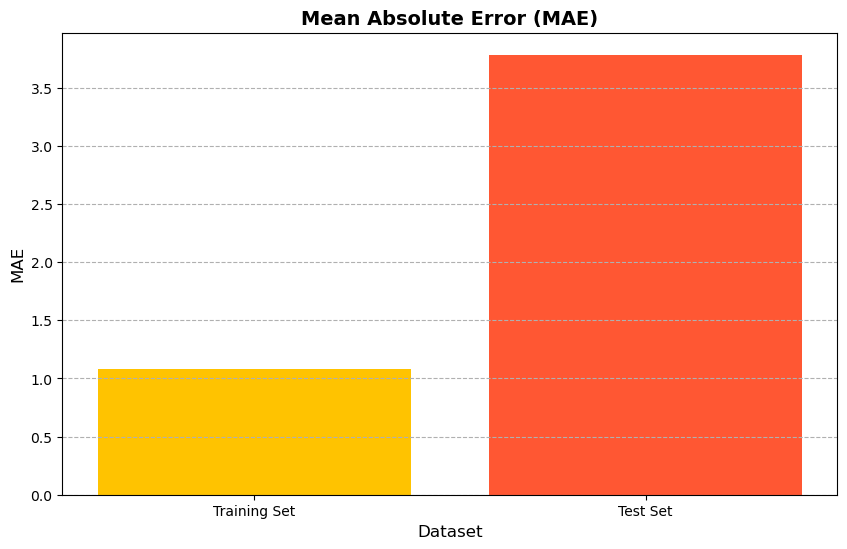

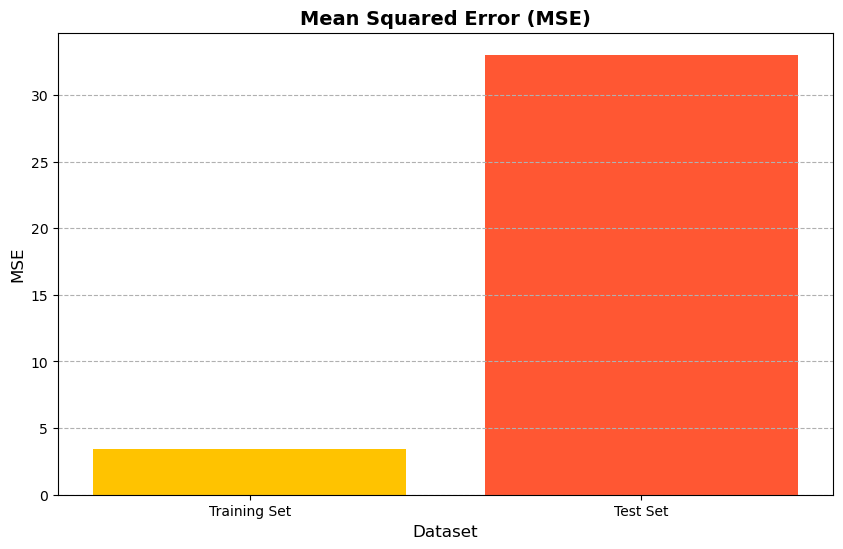

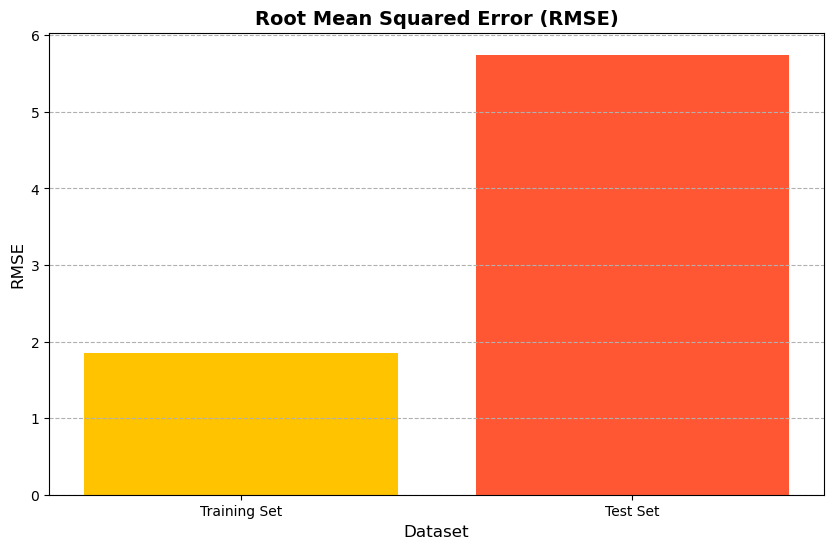

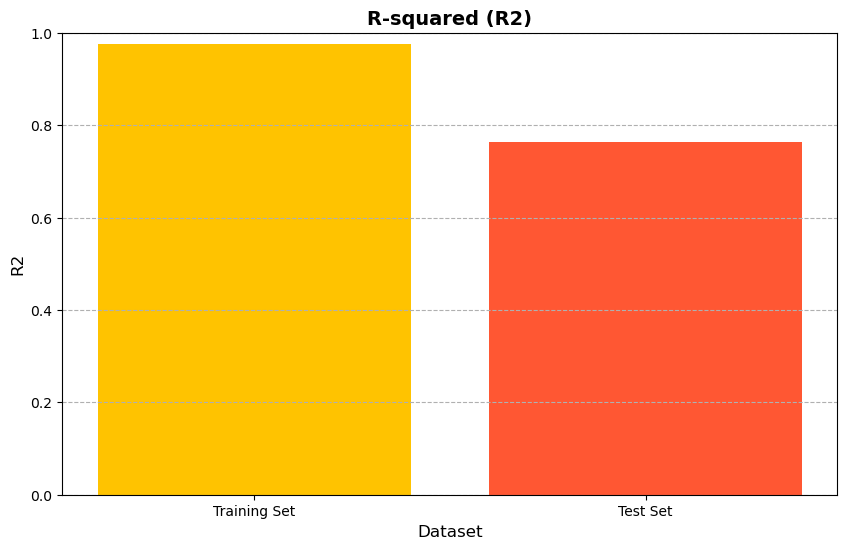

In [47]:
mae_values = [train_mae, test_mae]
mse_values = [train_mse, test_mse]
rmse_values = [train_rmse, test_rmse]
r2_values = [train_r2, test_r2]

labels = ['Training Set', 'Test Set']
x = np.arange(len(labels))

plt.figure(figsize=(10, 6))
plt.bar(x, mae_values, color=['#FFC300', '#FF5733'])
plt.xticks(x, labels)
plt.xlabel('Dataset', fontsize=12)
plt.ylabel('MAE', fontsize=12)
plt.title('Mean Absolute Error (MAE)', fontsize=14, fontweight='bold')
plt.ylim(bottom=0)
plt.grid(axis='y', linestyle='--')
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(x, mse_values, color=['#FFC300', '#FF5733'])
plt.xticks(x, labels)
plt.xlabel('Dataset', fontsize=12)
plt.ylabel('MSE', fontsize=12)
plt.title('Mean Squared Error (MSE)', fontsize=14, fontweight='bold')
plt.ylim(bottom=0)
plt.grid(axis='y', linestyle='--')
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(x, rmse_values, color=['#FFC300', '#FF5733'])
plt.xticks(x, labels)
plt.xlabel('Dataset', fontsize=12)
plt.ylabel('RMSE', fontsize=12)
plt.title('Root Mean Squared Error (RMSE)', fontsize=14, fontweight='bold')
plt.ylim(bottom=0)
plt.grid(axis='y', linestyle='--')
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(x, r2_values, color=['#FFC300', '#FF5733'])
plt.xticks(x, labels)
plt.xlabel('Dataset', fontsize=12)
plt.ylabel('R2', fontsize=12)
plt.title('R-squared (R2)', fontsize=14, fontweight='bold')
plt.ylim(top=1)
plt.grid(axis='y', linestyle='--')
plt.show()


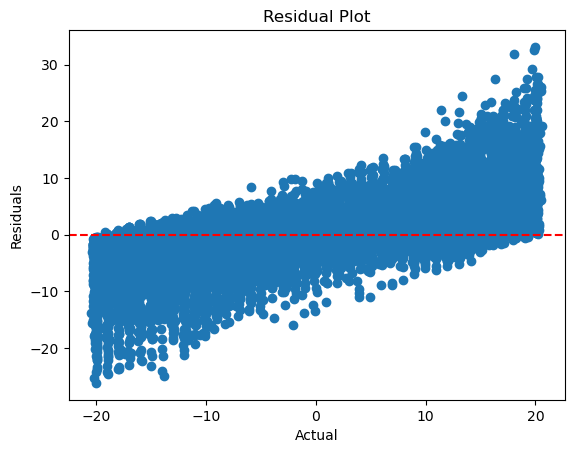

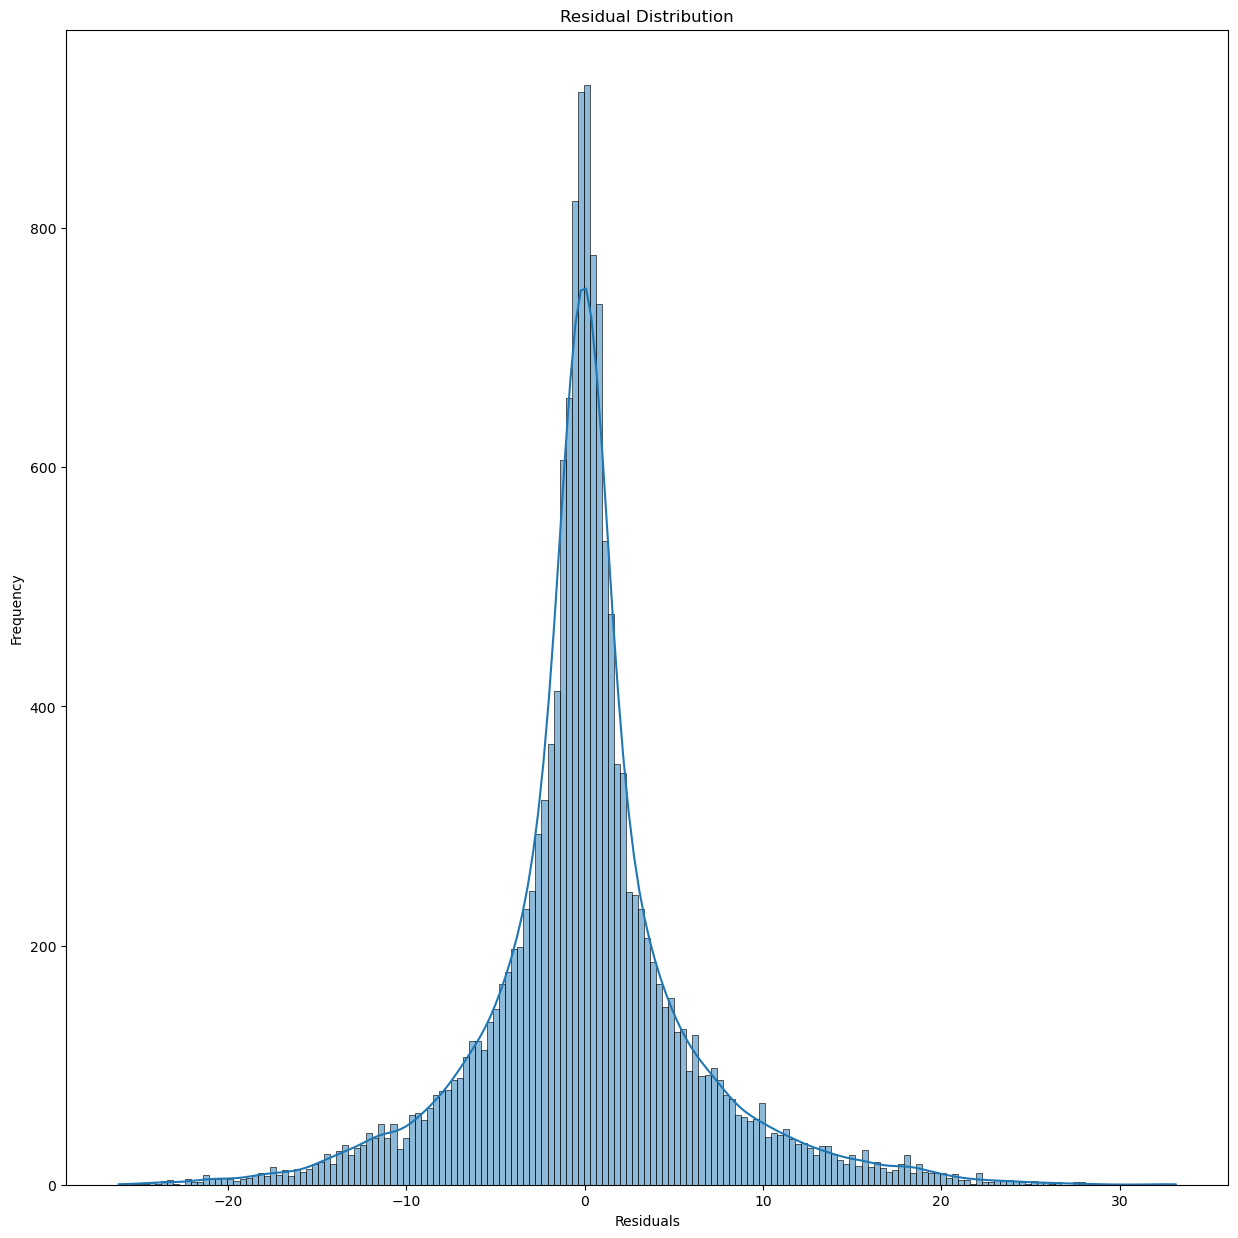

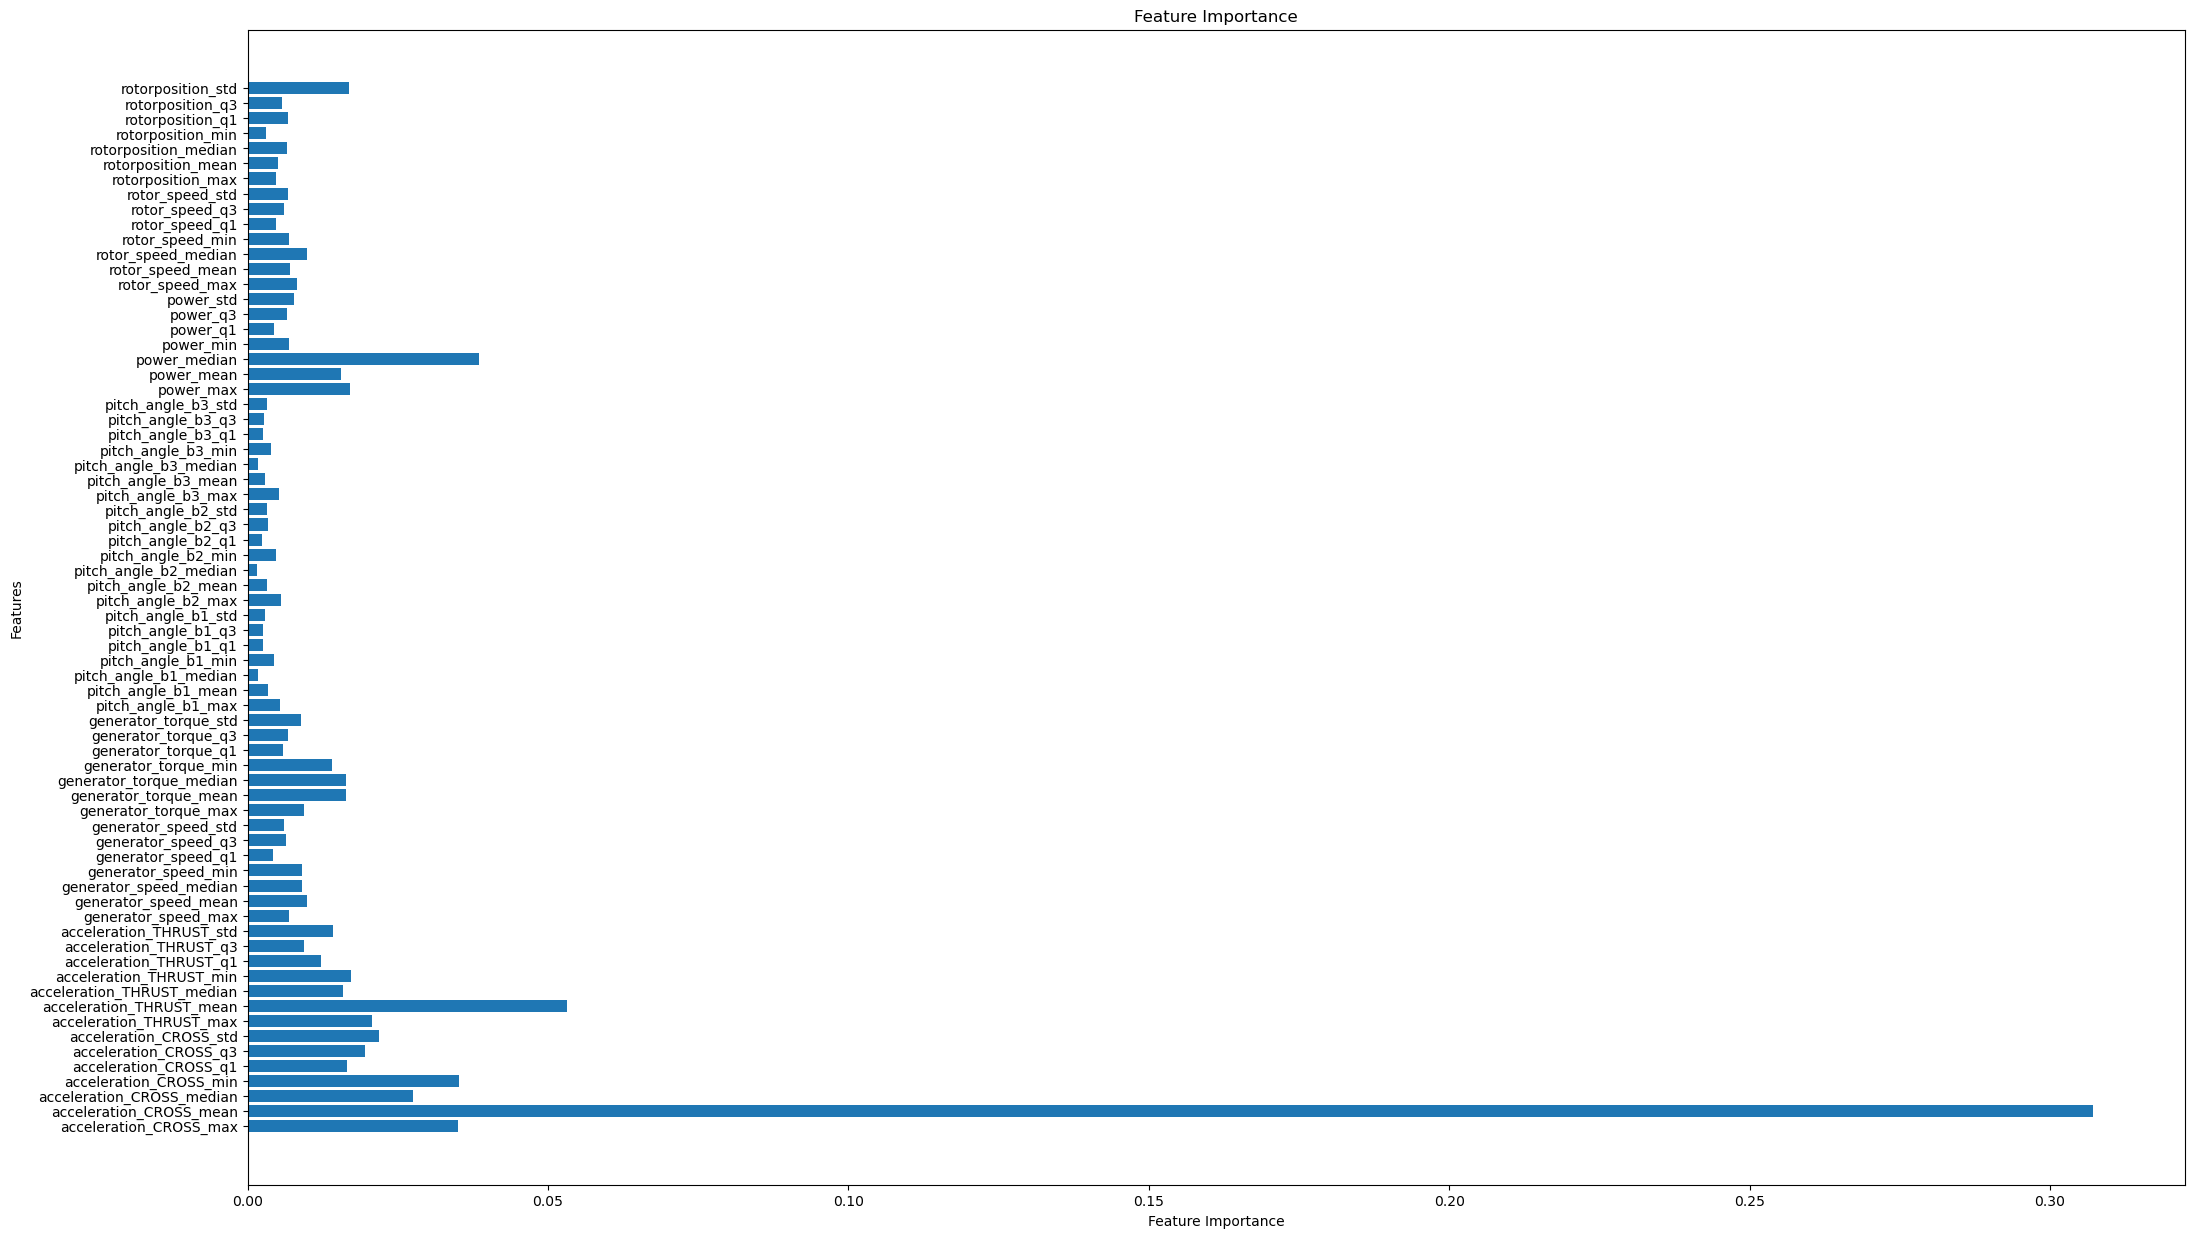

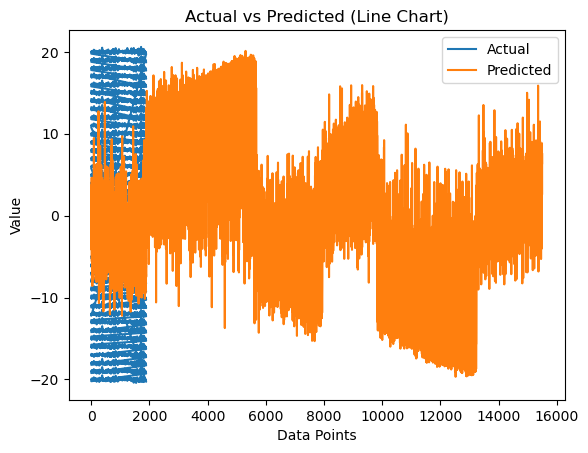

In [48]:
residuals = y_test - test_predictions
plt.scatter(y_test, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

plt.figure(figsize=(15, 15)) 
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residual Distribution')
plt.show()

feature_importances = rf_model.feature_importances_
feature_names = X_train.columns

plt.figure(figsize=(25, 15)) 
plt.barh(feature_names, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()


plt.plot(y_test, label='Actual')
plt.plot(test_predictions, label='Predicted')
plt.xlabel('Data Points')
plt.ylabel('Value')
plt.title('Actual vs Predicted (Line Chart)')
plt.legend()
plt.show()



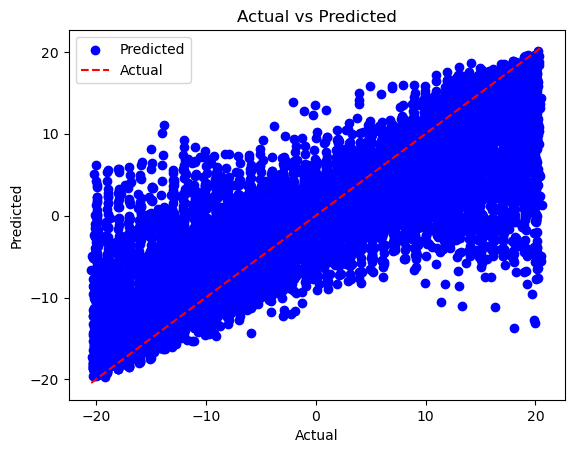

In [49]:
plt.scatter(y_test, test_predictions, color='blue', label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()



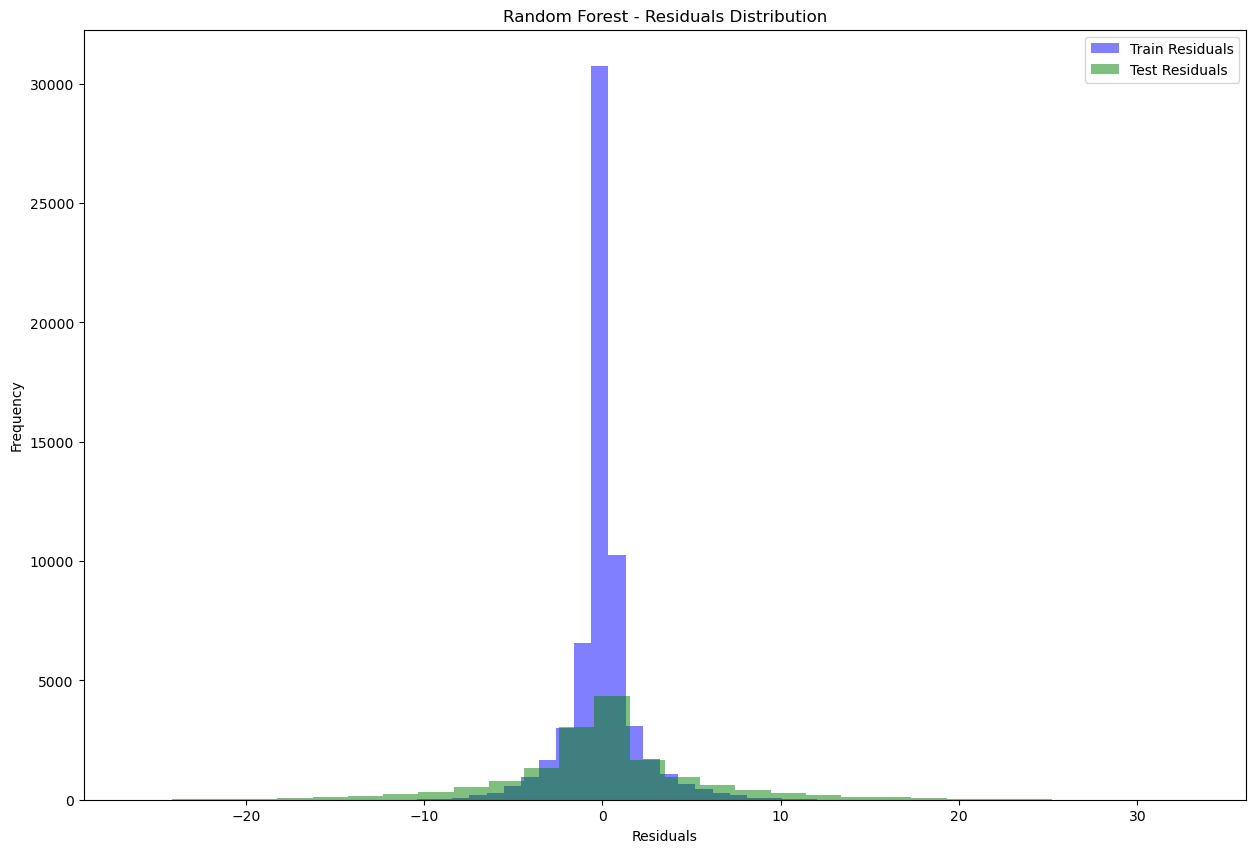

In [50]:
train_residuals = y_train - train_predictions
test_residuals = y_test - test_predictions

plt.figure(figsize=(15, 10))
plt.hist(train_residuals, bins=30, alpha=0.5, label='Train Residuals', color='blue')
plt.hist(test_residuals, bins=30, alpha=0.5, label='Test Residuals', color='green')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Random Forest - Residuals Distribution')
plt.legend()
plt.show()

## Turbulence

In [53]:

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

train_predictions = rf_model.predict(X_train)
test_predictions = rf_model.predict(X_test)

train_mae = mean_absolute_error(y_train, train_predictions)
train_mse = mean_squared_error(y_train, train_predictions)
train_rmse = mean_squared_error(y_train, train_predictions, squared=False)
train_r2 = r2_score(y_train, train_predictions)

test_mae = mean_absolute_error(y_test, test_predictions)
test_mse = mean_squared_error(y_test, test_predictions)
test_rmse = mean_squared_error(y_test, test_predictions, squared=False)
test_r2 = r2_score(y_test, test_predictions)

print("Training MAE:", train_mae)
print("Training MSE:", train_mse)
print("Training RMSE:", train_rmse)
print("Training R2:", train_r2)
print()
print("Test MAE:", test_mae)
print("Test MSE:", test_mse)
print("Test RMSE:", test_rmse)
print("Test R2:", test_r2)


Training MAE: 0.0002803898380731673
Training MSE: 3.843090663684833e-07
Training RMSE: 0.0006199266620887372
Training R2: 0.9995076786086481

Test MAE: 0.0019416293541320336
Test MSE: 9.862520478385183e-06
Test RMSE: 0.0031404650098966528
Test R2: 0.9868100423055167


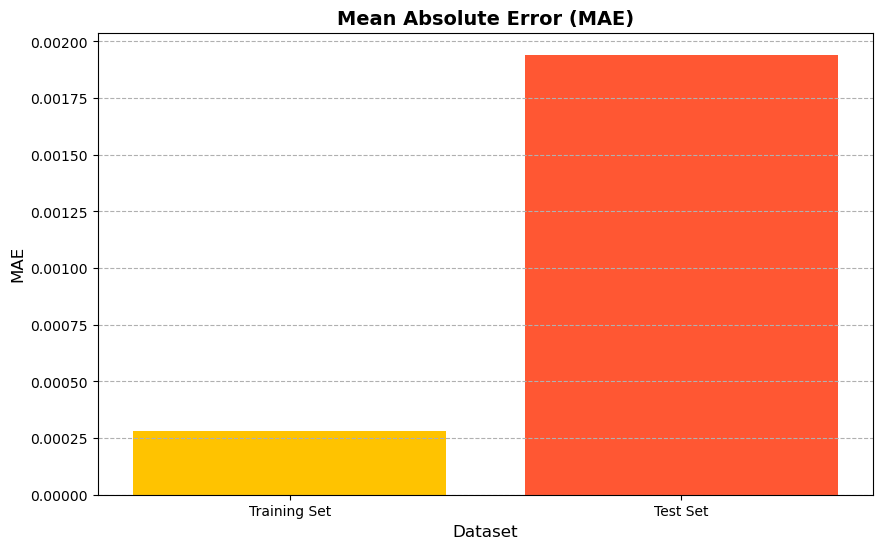

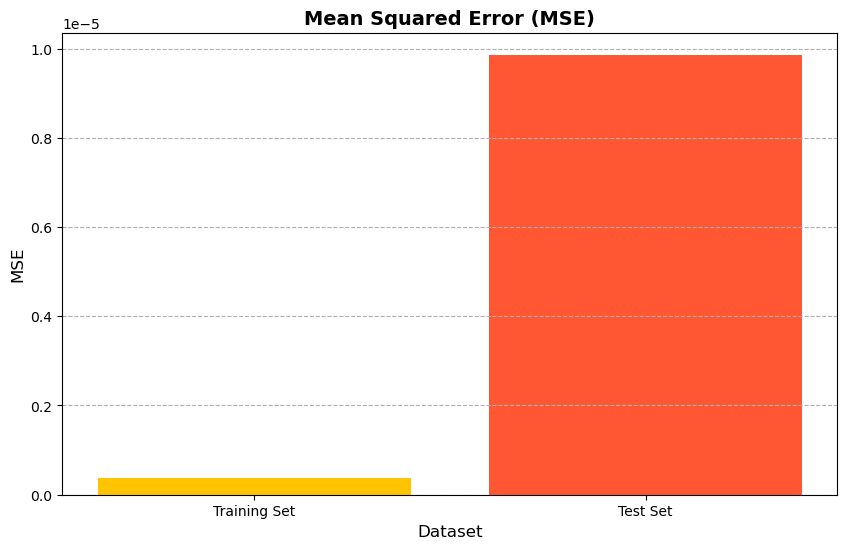

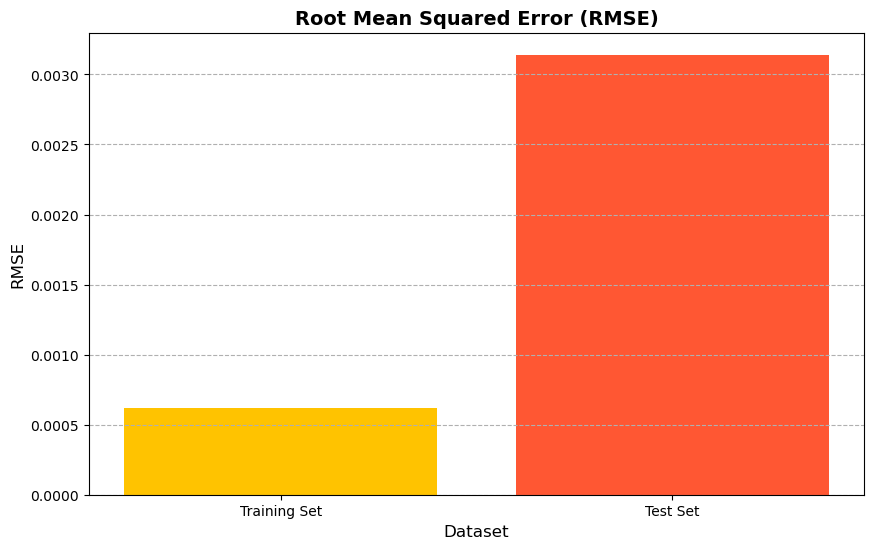

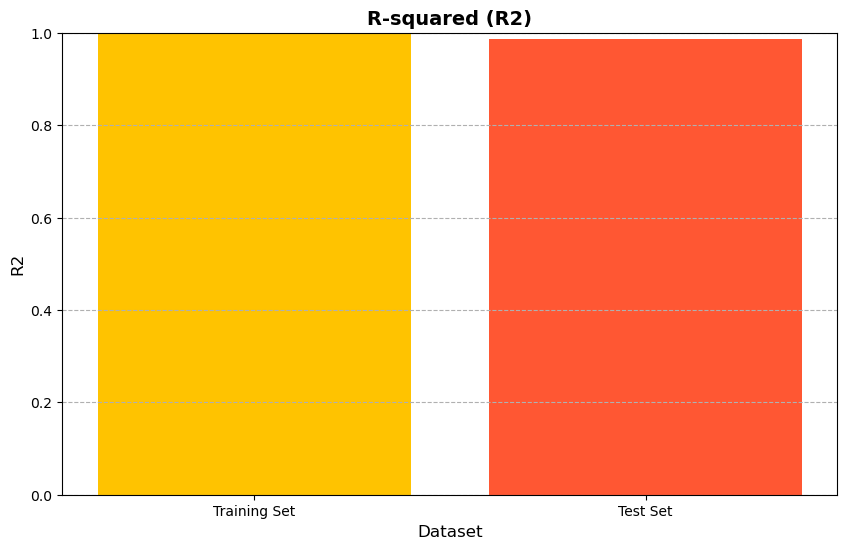

In [54]:
mae_values = [train_mae, test_mae]
mse_values = [train_mse, test_mse]
rmse_values = [train_rmse, test_rmse]
r2_values = [train_r2, test_r2]

labels = ['Training Set', 'Test Set']
x = np.arange(len(labels))

plt.figure(figsize=(10, 6))
plt.bar(x, mae_values, color=['#FFC300', '#FF5733'])
plt.xticks(x, labels)
plt.xlabel('Dataset', fontsize=12)
plt.ylabel('MAE', fontsize=12)
plt.title('Mean Absolute Error (MAE)', fontsize=14, fontweight='bold')
plt.ylim(bottom=0)
plt.grid(axis='y', linestyle='--')
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(x, mse_values, color=['#FFC300', '#FF5733'])
plt.xticks(x, labels)
plt.xlabel('Dataset', fontsize=12)
plt.ylabel('MSE', fontsize=12)
plt.title('Mean Squared Error (MSE)', fontsize=14, fontweight='bold')
plt.ylim(bottom=0)
plt.grid(axis='y', linestyle='--')
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(x, rmse_values, color=['#FFC300', '#FF5733'])
plt.xticks(x, labels)
plt.xlabel('Dataset', fontsize=12)
plt.ylabel('RMSE', fontsize=12)
plt.title('Root Mean Squared Error (RMSE)', fontsize=14, fontweight='bold')
plt.ylim(bottom=0)
plt.grid(axis='y', linestyle='--')
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(x, r2_values, color=['#FFC300', '#FF5733'])
plt.xticks(x, labels)
plt.xlabel('Dataset', fontsize=12)
plt.ylabel('R2', fontsize=12)
plt.title('R-squared (R2)', fontsize=14, fontweight='bold')
plt.ylim(top=1)
plt.grid(axis='y', linestyle='--')
plt.show()


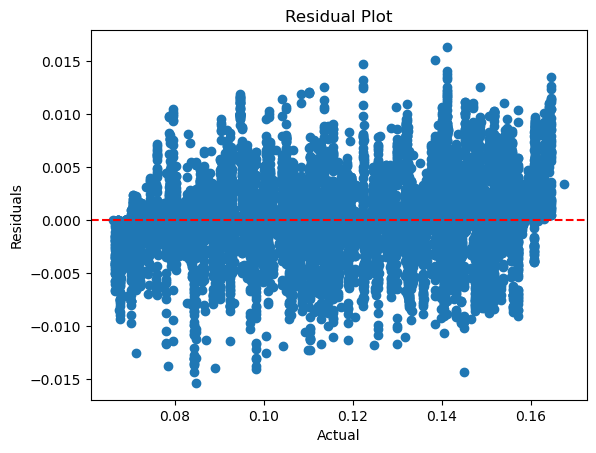

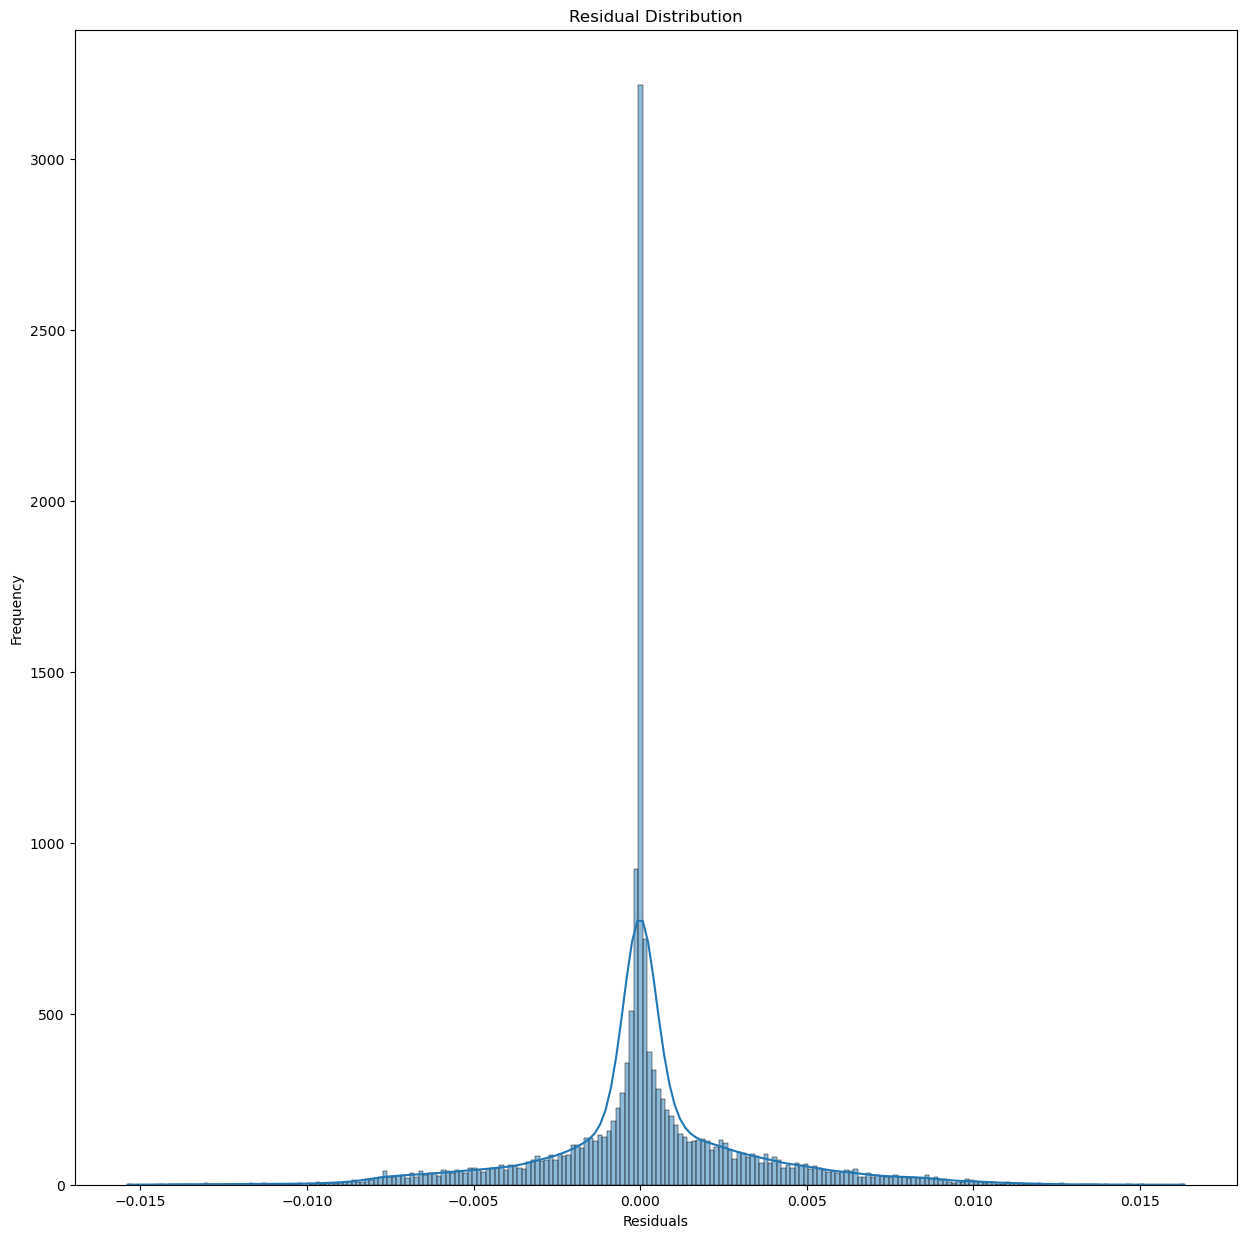

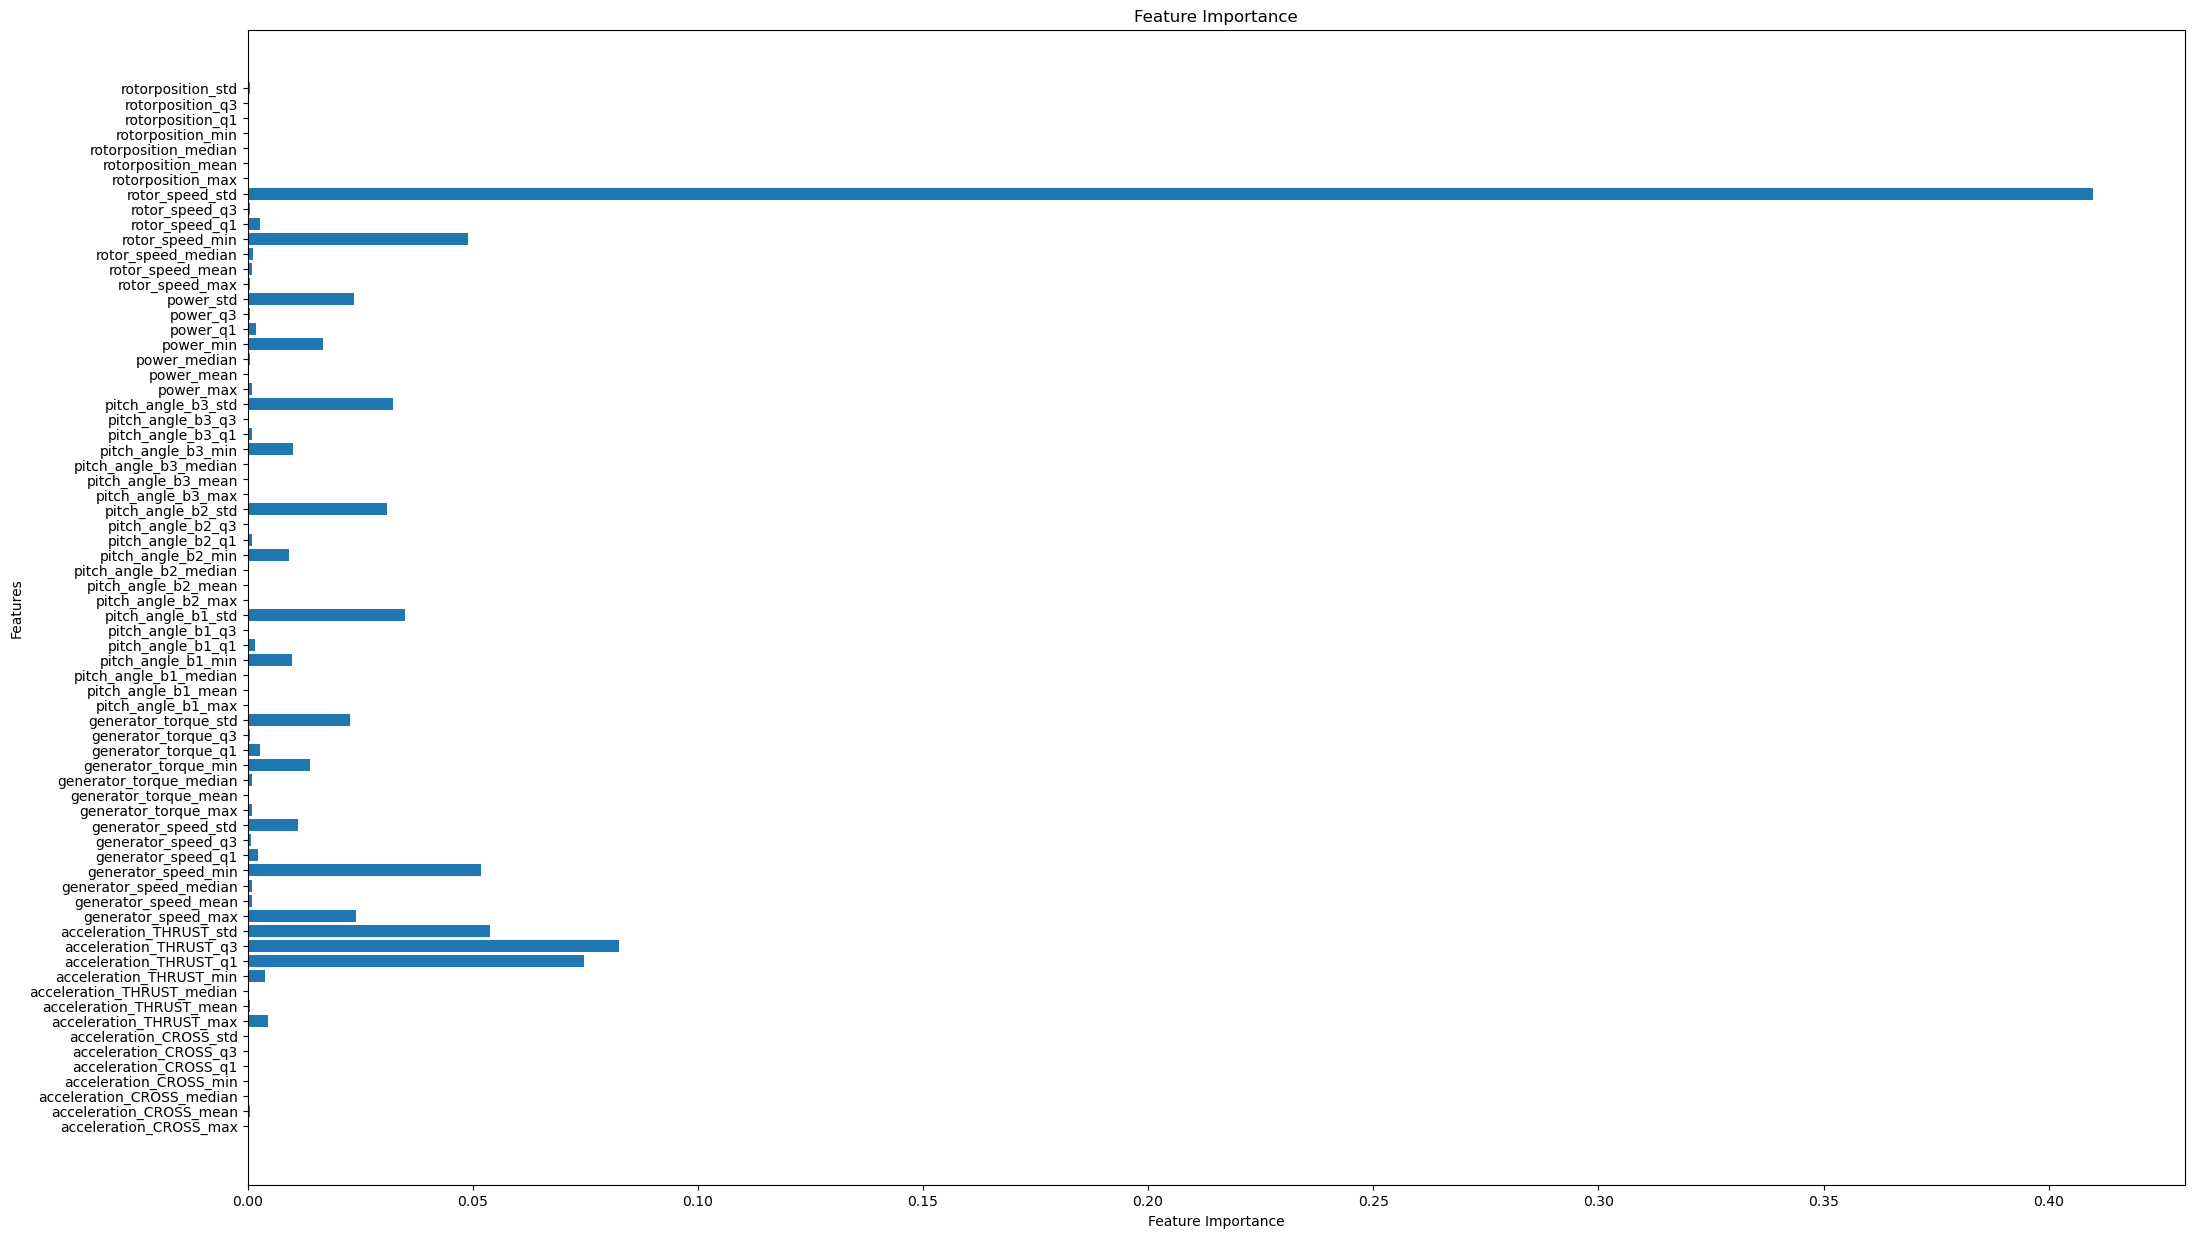

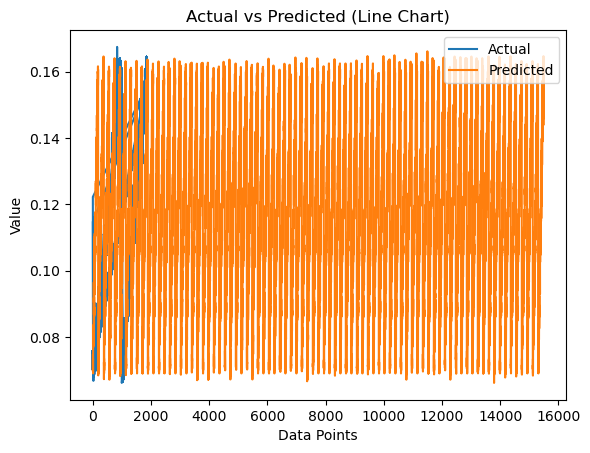

In [55]:
residuals = y_test - test_predictions
plt.scatter(y_test, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

plt.figure(figsize=(15, 15)) 
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residual Distribution')
plt.show()

feature_importances = rf_model.feature_importances_
feature_names = X_train.columns

plt.figure(figsize=(25, 15)) 
plt.barh(feature_names, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()


plt.plot(y_test, label='Actual')
plt.plot(test_predictions, label='Predicted')
plt.xlabel('Data Points')
plt.ylabel('Value')
plt.title('Actual vs Predicted (Line Chart)')
plt.legend()
plt.show()



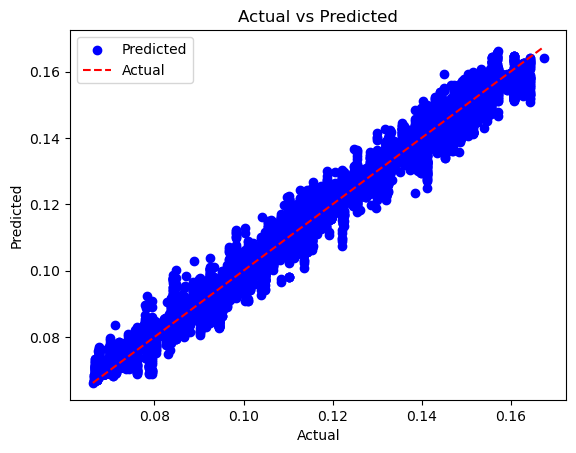

In [56]:
plt.scatter(y_test, test_predictions, color='blue', label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()



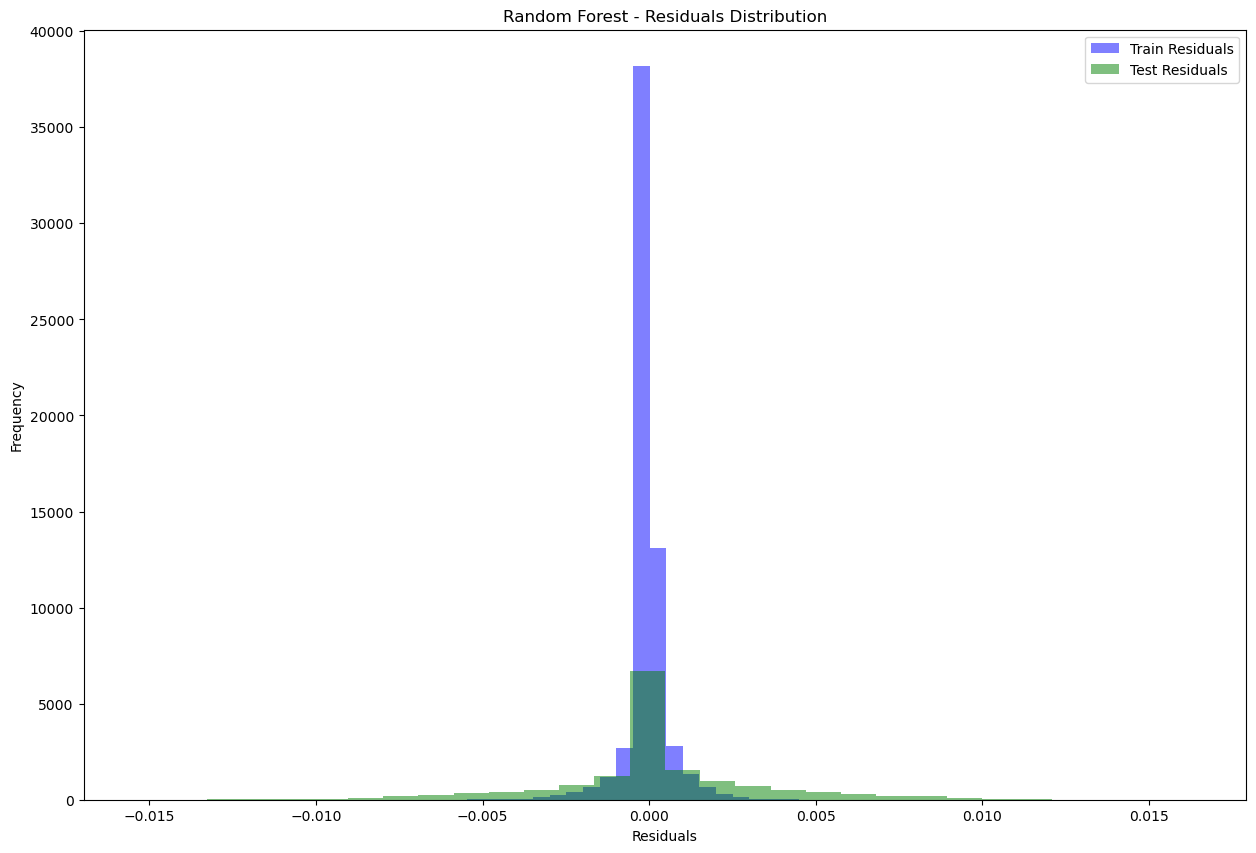

In [57]:
train_residuals = y_train - train_predictions
test_residuals = y_test - test_predictions

plt.figure(figsize=(15, 10))
plt.hist(train_residuals, bins=30, alpha=0.5, label='Train Residuals', color='blue')
plt.hist(test_residuals, bins=30, alpha=0.5, label='Test Residuals', color='green')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Random Forest - Residuals Distribution')
plt.legend()
plt.show()

 # Code Test

In [60]:
targets = ['wind_speed_mean', 'yaw_error_mean', 'Turbulence']  


for target_variable in targets:
    X_train, y_train = split_data(big_train_df, target_variable, columns_to_drop)
    X_test, y_test = split_data(big_test_df, target_variable, columns_to_drop)
    
    rf_model = RandomForestRegressor()
    rf_model.fit(X_train, y_train)
    
    train_predictions = rf_model.predict(X_train)
    test_predictions = rf_model.predict(X_test)
    
    train_mae = mean_absolute_error(y_train, train_predictions)
    train_mse = mean_squared_error(y_train, train_predictions)
    train_rmse = mean_squared_error(y_train, train_predictions, squared=False)
    train_r2 = r2_score(y_train, train_predictions)
    
    test_mae = mean_absolute_error(y_test, test_predictions)
    test_mse = mean_squared_error(y_test, test_predictions)
    test_rmse = mean_squared_error(y_test, test_predictions, squared=False)
    test_r2 = r2_score(y_test, test_predictions)
    
    print("Target Variable:", target_variable)
    print("Training MAE:", train_mae)
    print("Training MSE:", train_mse)
    print("Training RMSE:", train_rmse)
    print("Training R2:", train_r2)
    print()
    print("Test MAE:", test_mae)
    print("Test MSE:", test_mse)
    print("Test RMSE:", test_rmse)
    print("Test R2:", test_r2)
    print()
    
    mae_values = [train_mae, test_mae]
    mse_values = [train_mse, test_mse]
    rmse_values = [train_rmse, test_rmse]
    r2_values = [train_r2, test_r2]

    labels = ['Training Set', 'Test Set']
    x = np.arange(len(labels))

    plt.figure(figsize=(10, 6))
    plt.bar(x, mae_values, color=['#FFC300', '#FF5733'])
    plt.xticks(x, labels)
    plt.xlabel('Dataset', fontsize=12)
    plt.ylabel('MAE', fontsize=12)
    plt.title('Mean Absolute Error (MAE) - {}'.format(target_variable), fontsize=14, fontweight='bold')
    plt.ylim(bottom=0)
    plt.grid(axis='y', linestyle='--')
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.bar(x, mse_values, color=['#FFC300', '#FF5733'])
    plt.xticks(x, labels)
    plt.xlabel('Dataset', fontsize=12)
    plt.ylabel('MSE', fontsize=12)
    plt.title('Mean Squared Error (MSE) - {}'.format(target_variable), fontsize=14, fontweight='bold')
    plt.ylim(bottom=0)
    plt.grid(axis='y', linestyle='--')
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.bar(x, rmse_values, color=['#FFC300', '#FF5733'])
    plt.xticks(x, labels)
    plt.xlabel('Dataset', fontsize=12)
    plt.ylabel('RMSE', fontsize=12)
    plt.title('Root Mean Squared Error (RMSE) - {}'.format(target_variable), fontsize=14, fontweight='bold')
    plt.ylim(bottom=0)
    plt.grid(axis='y', linestyle='--')
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.bar(x, r2_values, color=['#FFC300', '#FF5733'])
    plt.xticks(x, labels)
    plt.xlabel('Dataset', fontsize=12)
    plt.ylabel('R2', fontsize=12)
    plt.title('R-squared (R2) - {}'.format(target_variable), fontsize=14, fontweight='bold')
    plt.ylim(top=1)
    plt.grid(axis='y', linestyle='--')
    plt.show()
    
    residuals = y_test - test_predictions

    plt.scatter(y_test, residuals)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel('Actual')
    plt.ylabel('Residuals')
    plt.title('Residual Plot - {}'.format(target_variable))
    plt.show()

    plt.figure(figsize=(15, 15)) 
    sns.histplot(residuals, kde=True)
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.title('Residual Distribution - {}'.format(target_variable))
    plt.show()

    feature_importances = rf_model.feature_importances_
    feature_names = X_train.columns

    plt.figure(figsize=(25, 15)) 
    plt.barh(feature_names, feature_importances)
    plt.xlabel('Feature Importance')
    plt.ylabel('Features')
    plt.title('Feature Importance - {}'.format(target_variable))
    plt.show()

    plt.plot(y_test, label='Actual')
    plt.plot(test_predictions, label='Predicted')
    plt.xlabel('Data Points')
    plt.ylabel('Value')
    plt.title('Actual vs Predicted (Line Chart) - {}'.format(target_variable))
    plt.legend()
    plt.show()

    plt.scatter(y_test, test_predictions, color='blue', label='Predicted')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Actual')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Actual vs Predicted')
    plt.legend()
    plt.show()
    
    train_residuals = y_train - train_predictions
    test_residuals = y_test - test_predictions

    plt.figure(figsize=(15, 10))
    plt.hist(train_residuals, bins=30, alpha=0.5, label='Train Residuals', color='blue')
    plt.hist(test_residuals, bins=30, alpha=0.5, label='Test Residuals', color='green')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.title('Random Forest - Residuals Distribution')
    plt.legend()
    plt.show()
  

Target Variable: wind_speed_mean
Training MAE: 0.025195377654105646
Training MSE: 0.0022734583475981897
Training RMSE: 0.04768079642369861
Training R2: 0.9999419496333272

Test MAE: 0.13514663953152597
Test MSE: 0.045893556351867135
Test RMSE: 0.2142278141415515
Test R2: 0.9987633897982675

Target Variable: yaw_error_mean
Training MAE: 1.0803687164897169
Training MSE: 3.4053330973979414
Training RMSE: 1.8453544638897812
Training R2: 0.9756801330172569

Test MAE: 3.7840813416155132
Test MSE: 32.92013325807936
Test RMSE: 5.73760692781227
Test R2: 0.7648862596670071

Target Variable: Turbulence
Training MAE: 0.00027924209541768284
Training MSE: 3.830383798251103e-07
Training RMSE: 0.0006189009450833876
Training R2: 0.9995093064291233

Test MAE: 0.0019306656740849697
Test MSE: 9.795445926037617e-06
Test RMSE: 0.0031297677111948126
Test R2: 0.9868997466067427

